In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%cd Z:\PPMI_Data\Excels\CollaborativeFiltering\Methylation_Model

Z:\PPMI_Data\Excels\CollaborativeFiltering\Methylation_Model


In [2]:
df1 = pd.read_csv("Age_PATNO.csv")
data = pd.read_csv("NMI_Methylome_Male06_Data.csv")
df = pd.merge(df1, data, on='PATNO', how='inner')
print(df.shape)
df.to_csv("NMI_Methylome_Male06_Age.csv", index=False)
df.head(2)

(308, 330)


,PATNO,Age,APPRDX,cg16117273,cg24860848,cg11877812,cg04414720,cg07400453,cg15953070,cg06942628,...,cg09372808,cg08109545,cg03769939,cg04824818,cg19056515,cg18868933,cg11206312,cg00295303,cg00113363,cg23377551
0,3001,65.142466,1,0.271174,0.783908,0.877517,0.152477,0.897180,0.861183,0.892934,...,0.859071,0.910721,0.817815,0.941467,0.966428,0.850839,0.021457,0.824603,0.021304,0.783802
1,3004,59.413699,2,0.218033,0.760298,0.833439,0.053786,0.877265,0.870926,0.868634,...,0.873619,0.911777,0.754973,0.948919,0.936251,0.893749,0.016610,0.883748,0.010358,0.767463


In [8]:
df1 = df.drop(['PATNO','APPRDX'], axis=1)

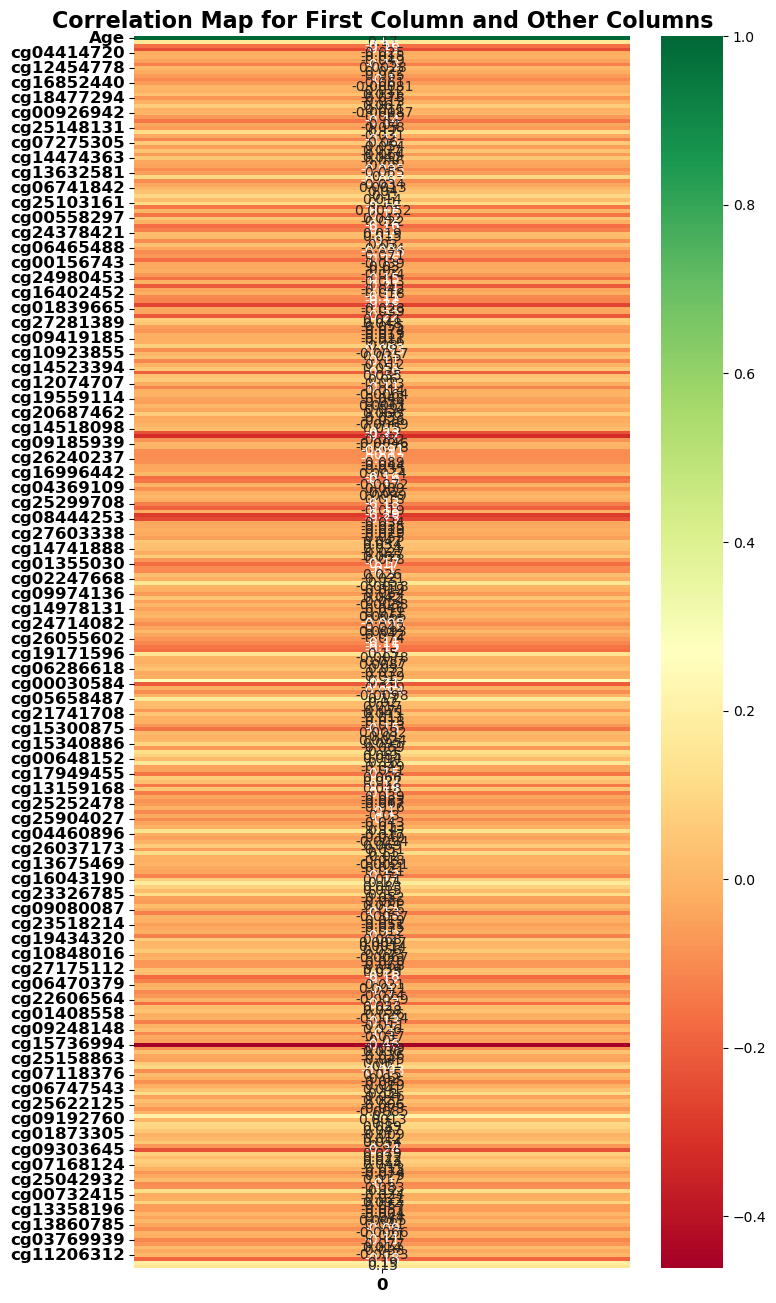

In [14]:
# Select the first column of the dataframe as a series
first_col = df1.iloc[:, 0]

# Calculate the correlation matrix between the first column and every other column
corrmat = df1.corrwith(first_col)

# Plot the correlation matrix using seaborn
plt.figure(figsize=(8,16))
sns.heatmap(corrmat.to_frame(), annot=True, cmap='RdYlGn')
plt.title('Correlation Map for First Column and Other Columns', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.savefig('correlation_map.pdf')
plt.show()

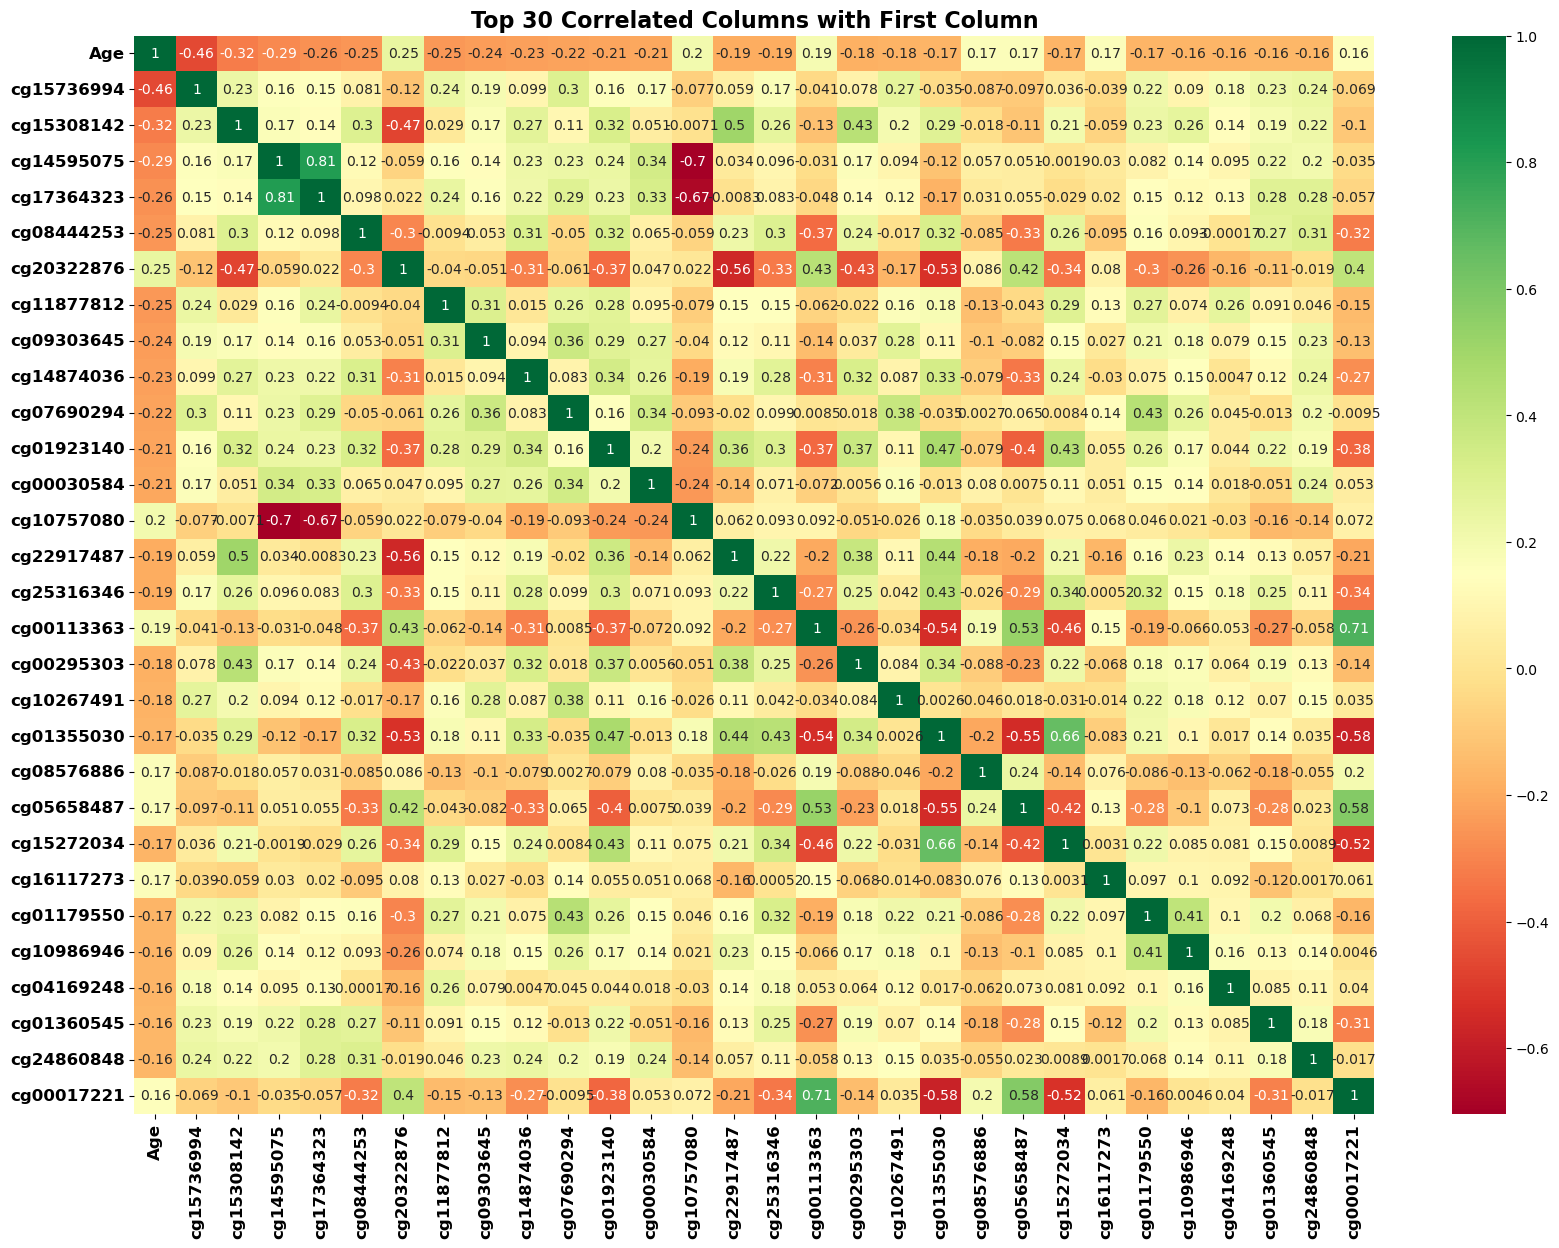

In [17]:
# Select the first column of the dataframe as a series
first_col = df1.iloc[:, 0]

# Calculate the correlation matrix between the first column and every other column
corrmat = df1.corrwith(first_col)

# Select the top 30 correlated columns
top_corr_cols = corrmat.abs().nlargest(30).index
top_corrmat = df1[top_corr_cols].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(20, 14))
sns.heatmap(top_corrmat, annot=True, cmap='RdYlGn')
plt.title('Top 30 Correlated Columns with First Column', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.savefig('correlationtop30_map.pdf')
plt.show()
